In [171]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [172]:
import pandas as pd
df=pd.read_csv("HeartData.csv")
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Goal
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [173]:
df.shape

(200, 14)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  Goal      200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 14.9+ KB


In [175]:
df.dtypes

Age          int64
Sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
Goal         int64
dtype: object

In [176]:
df.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Goal'],
      dtype='object')

In [177]:
#Columns with Object DataType
df_c = df.select_dtypes(include=['object']).columns

In [178]:
#Columns with int64 DataType
df.select_dtypes(include=['int64']).columns

Index(['Age', 'Sex', 'cp', 'restecg', 'Goal'], dtype='object')

In [179]:
#Replacing the question mark with NaN
df = df.replace('?',np.nan)
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Goal
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [180]:
#Checking Presence of NaN Values
df.isnull().values.any()

True

In [181]:
#As Null Values are Identified, Let's Check the Count Present 
df.isnull().sum()

Age           0
Sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
Goal          0
dtype: int64

In [182]:
#Impute Missing Values With Mean as we are having numeric values in the dataset

for col in ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal']:
    df[col].fillna(df[col].mode()[0],inplace=True)

df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Goal
0,63,1,4,140,260,0,1,112,1,3,2,0,7,2
1,44,1,4,130,209,0,1,127,0,0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,2
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,2,0,7,1
196,62,1,1,120,139,0,1,120,1,0,2,0,7,0
197,55,1,4,122,223,1,1,100,0,0,2,0,6,2
198,58,1,4,120,385,1,2,120,1,0,2,0,7,0


In [183]:
#Checking Once Again Presence of NaN Values
df.isnull().values.any()

False

Data Structuring / Verifing

In [184]:
df.dtypes

Age          int64
Sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
Goal         int64
dtype: object

In [185]:
print('Catagorical Columns','\n','\n',df.select_dtypes(include=['object']).columns)


print('\n','\n','Numberic Columns', '\n', '\n',df.select_dtypes(include=['int64']).columns)

Catagorical Columns 
 
 Index(['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')

 
 Numberic Columns 
 
 Index(['Age', 'Sex', 'cp', 'restecg', 'Goal'], dtype='object')


In [186]:
df['Goal'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

Correlation

In [187]:
df.corr()

,Age,Sex,cp,restecg,Goal
Age,1.000000,0.034230,-0.038280,0.002400,0.287289
Sex,0.034230,1.000000,0.038036,0.060621,0.147470
cp,-0.038280,0.038036,1.000000,0.034790,0.168210
restecg,0.002400,0.060621,0.034790,1.000000,-0.032800
Goal,0.287289,0.147470,0.168210,-0.032800,1.000000


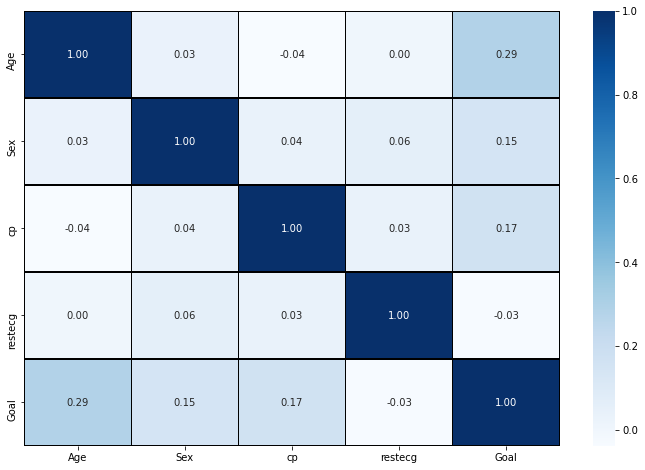

In [188]:
corr=df.corr()
plt.figure(figsize=(12,8))
sb.heatmap(corr,annot=True,linewidths=.5,linecolor="black",fmt=".2f",cmap='Blues')
plt.show()


Text(0.5, 1.0, 'Correlation With Target Variabe')

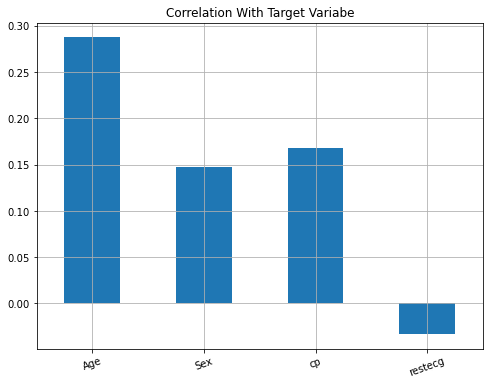

In [189]:
#checking with correlation
plt.figure(figsize=(8,6))
df.drop('Goal',axis=1).corrwith(df['Goal']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('Correlation With Target Variabe')

Univariant Ananlysis

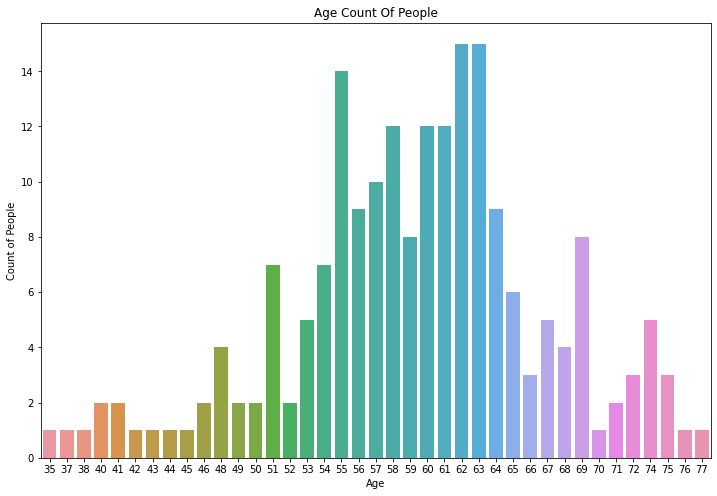

In [190]:
#Checking The Count of People Age
plt.subplots(figsize=(12,8))
sb.countplot(x='Age',data=df)
plt.title("Age Count Of People")
plt.xlabel('Age')
plt.ylabel('Count of People')
plt.show()


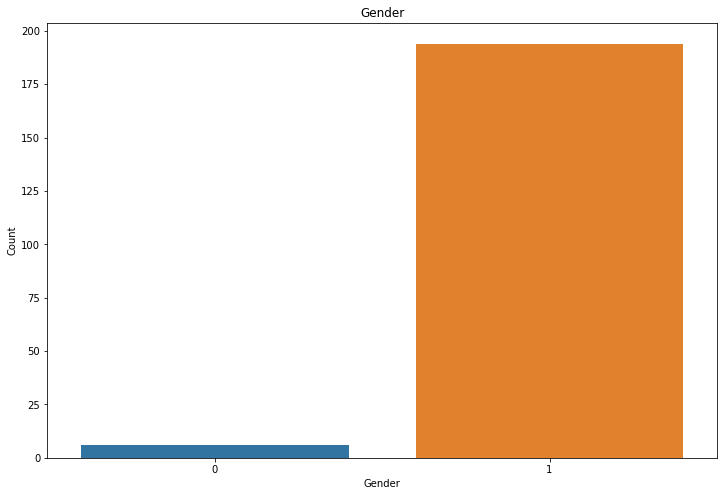

In [191]:
plt.subplots(figsize=(12,8))
sb.countplot(x='Sex',data=df)
plt.title("Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

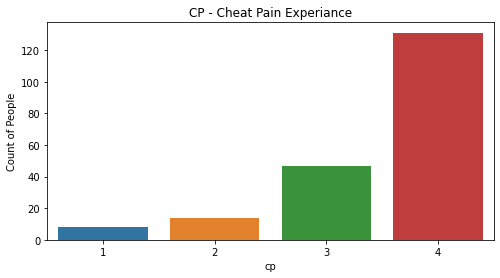

In [192]:
plt.subplots(figsize=(8,4))
sb.countplot(x='cp',data=df)
plt.title("CP - Cheat Pain Experiance")
plt.xlabel('cp')
plt.ylabel('Count of People')
plt.show()

Bi Variant Ananlysis

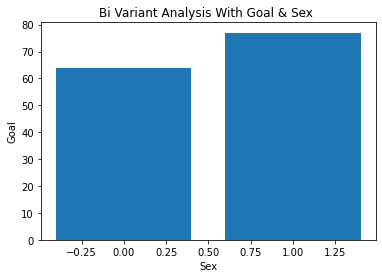

In [193]:
plt.bar(df["Sex"],df['Age'])
plt.title("Bi Variant Analysis With Goal & Sex ")
plt.ylabel('Goal')
plt.xlabel('Sex')
plt.show()

Checking The Skewness

In [194]:
df.skew()

Age        -0.404091
Sex        -5.552105
cp         -1.648734
trestbps   -0.773003
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.823429
slope       0.210521
ca          0.000000
thal       -5.920627
Goal        0.297393
dtype: float64

In [195]:
#treating the skewness with Square and Cube Root Method

df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<0.55:
            df[col]=np.cbrt(df[col])

In [197]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['chol']=le.fit_transform(df['chol'].astype(str))
df['trestbps']=le.fit_transform(df['trestbps'].astype(str))
df['fbs']=le.fit_transform(df['fbs'].astype(str))
df['thalach']=le.fit_transform(df['thalach'].astype(str))
df['exang']=le.fit_transform(df['exang'].astype(str))
df['oldpeak']=le.fit_transform(df['oldpeak'].astype(str))
df['slope']=le.fit_transform(df['slope'].astype(str))
df['ca']=le.fit_transform(df['ca'].astype(str))
df['thal']=le.fit_transform(df['thal'].astype(str))

In [198]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Goal
0,3.979057,1.0,1.587401,23,62,0,1.000000,8,1,11,1,0,2,1.259921
1,3.530348,1.0,1.587401,17,28,0,1.000000,21,0,1,1,0,2,0.000000
2,3.914868,1.0,1.587401,18,35,0,1.000000,30,1,6,2,0,2,1.259921
3,3.802952,1.0,1.587401,24,45,0,1.000000,35,1,10,0,0,2,1.000000
4,4.041240,1.0,1.442250,5,31,1,1.259921,58,1,5,1,0,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.779763,0.0,1.587401,15,91,1,1.000000,38,0,1,1,0,2,1.000000
196,3.957892,1.0,1.000000,10,2,0,1.000000,14,1,1,1,0,2,0.000000
197,3.802952,1.0,1.587401,11,40,1,1.000000,0,0,1,1,0,1,1.259921
198,3.870877,1.0,1.587401,10,97,1,1.259921,14,1,1,1,0,2,0.000000


Removing Outliers

In [201]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape
import warnings
warnings.filterwarnings('ignore')

In [202]:
thresold =3 
print (np.where(z>3))

(array([ 12,  51,  66,  72,  76,  79,  96,  97, 126, 128, 131, 133, 137,
       152, 171, 171, 189, 190, 194, 195, 196], dtype=int32), array([12,  1,  2,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2,  0,  0, 12, 12,
        1, 12,  1,  2], dtype=int32))


In [203]:
x = df.iloc[:,1:-1]
x

,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,1.587401,23,62,0,1.000000,8,1,11,1,0,2
1,1.0,1.587401,17,28,0,1.000000,21,0,1,1,0,2
2,1.0,1.587401,18,35,0,1.000000,30,1,6,2,0,2
3,1.0,1.587401,24,45,0,1.000000,35,1,10,0,0,2
4,1.0,1.442250,5,31,1,1.259921,58,1,5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,1.587401,15,91,1,1.000000,38,0,1,1,0,2
196,1.0,1.000000,10,2,0,1.000000,14,1,1,1,0,2
197,1.0,1.587401,11,40,1,1.000000,0,0,1,1,0,1
198,1.0,1.587401,10,97,1,1.259921,14,1,1,1,0,2


In [207]:
y = round(df['Goal'],0)
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Goal, dtype: float64

In [208]:
print (x.shape,'\t\t',y.shape)

(200, 12) 		 (200,)


In [209]:
#Scaling the input Values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[ 0.17586311,  0.57266942,  0.73393513, ..., -0.13833702,
         0.        ,  0.23735633],
       [ 0.17586311,  0.57266942,  0.07074074, ..., -0.13833702,
         0.        ,  0.23735633],
       [ 0.17586311,  0.57266942,  0.18127313, ...,  1.9899248 ,
         0.        ,  0.23735633],
       ...,
       [ 0.17586311,  0.57266942, -0.59245366, ..., -0.13833702,
         0.        , -2.72959781],
       [ 0.17586311,  0.57266942, -0.70298606, ..., -0.13833702,
         0.        ,  0.23735633],
       [ 0.17586311, -1.75611765, -0.70298606, ..., -0.13833702,
         0.        ,  0.23735633]])

In [210]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.17586311,  0.71195988,  0.82505025, ..., -0.12898846,
         0.        ,  0.25264558],
       [ 0.17586311,  0.71195988,  0.24437789, ..., -0.12898846,
         0.        ,  0.25264558],
       [ 0.17586311,  0.71195988,  0.34929335, ...,  1.96468172,
         0.        ,  0.25264558],
       ...,
       [ 0.17586311,  0.71195988, -0.48481172, ..., -0.12898846,
         0.        , -3.95807958],
       [ 0.17586311,  0.71195988, -0.62882781, ..., -0.12898846,
         0.        ,  0.25264558],
       [ 0.17586311, -1.77518714, -0.62882781, ..., -0.12898846,
         0.        ,  0.25264558]])

In [211]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
model=lg()
model.fit(x_train,y_train)

LogisticRegression()

In [216]:
#Checking The Shape

print(x_train.shape,'\t\t',x_test.shape)

(160, 12) 		 (40, 12)


In [215]:
pred=model.predict(x_test)
print(pred)

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.]


In [218]:
print ("Accuracy Score:",round(accuracy_score(y_test,pred),2),'\n')
print ("Confusion Matrix:","\n","\n",confusion_matrix(y_test,pred),'\n')
print ("Classification Report:","\n","\n",classification_report(y_test,pred))

Accuracy Score: 0.75 

Confusion Matrix: 
 
 [[ 5  5  0]
 [ 3 25  0]
 [ 0  2  0]] 

Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.56        10
         1.0       0.78      0.89      0.83        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.75        40
   macro avg       0.47      0.46      0.46        40
weighted avg       0.70      0.75      0.72        40



In [229]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print('Accuracy Score:',round(accuracy_score(y_test,predsvc),2),'\t')
    print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predsvc))
    print('\n','Classification Report:','\n','\n',classification_report(y_test,predsvc))

In [220]:
svmkernel("poly")

Accuracy Score: 0.75 	

 Confusion Matrix: 
 
 [[ 3  7  0]
 [ 1 27  0]
 [ 0  2  0]]

 Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.75      0.30      0.43        10
         1.0       0.75      0.96      0.84        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.75        40
   macro avg       0.50      0.42      0.42        40
weighted avg       0.71      0.75      0.70        40



In [221]:
svmkernel("rbf")

Accuracy Score: 0.75 	

 Confusion Matrix: 
 
 [[ 3  7  0]
 [ 1 27  0]
 [ 0  2  0]]

 Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.75      0.30      0.43        10
         1.0       0.75      0.96      0.84        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.75        40
   macro avg       0.50      0.42      0.42        40
weighted avg       0.71      0.75      0.70        40



In [232]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,preddtc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,preddtc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,preddtc))



Accuracy Score: 0.6 	

 Confusion Matrix: 
 
 [[ 4  6  0]
 [ 3 20  5]
 [ 1  1  0]]

 Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44        10
         1.0       0.74      0.71      0.73        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.60        40
   macro avg       0.41      0.37      0.39        40
weighted avg       0.64      0.60      0.62        40



In [223]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predknn),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predknn))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predknn))

Accuracy Score: 0.57 	

 Confusion Matrix: 
 
 [[ 2  8  0]
 [ 7 21  0]
 [ 0  2  0]]

 Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.22      0.20      0.21        10
         1.0       0.68      0.75      0.71        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.57        40
   macro avg       0.30      0.32      0.31        40
weighted avg       0.53      0.57      0.55        40



In [224]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score:',round(accuracy_score(y_test,predrfc),2),'\t')
print('\n','Confusion Matrix:','\n','\n',confusion_matrix(y_test,predrfc))
print('\n','Classification Report:','\n','\n',classification_report(y_test,predrfc))

Accuracy Score: 0.7 	

 Confusion Matrix: 
 
 [[ 3  7  0]
 [ 3 25  0]
 [ 0  2  0]]

 Classification Report: 
 
               precision    recall  f1-score   support

         0.0       0.50      0.30      0.37        10
         1.0       0.74      0.89      0.81        28
         2.0       0.00      0.00      0.00         2

    accuracy                           0.70        40
   macro avg       0.41      0.40      0.39        40
weighted avg       0.64      0.70      0.66        40



In [ ]:
SVC is having the best accuracy of 75% when compare with other model.

In [250]:
import pickle
filename='Heartpred_Project5.pkl'
pickle.dump(SVC,open(filename,'wb'))